In [1]:
### To make bottom 2 panels of Figure 2 in 3-D CMZ Paper I

# Imported from make_nh2_and_t_plots.py
# updated


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
#from matplotlib import *
import aplpy
from astropy.io import fits
import numpy as np
from astropy import units as u

In [3]:
#path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/'
#Updated Feb. 2022
path='/Users/battersby/Dropbox/Work/higal_cmz/nh2_pdfs/all_fits_files/'

# Figure path
figpath = '/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/'

In [4]:
# Make a temp file that has 0s instead of nans to help with plotting
# Original: temp_conv36_source_only.fits
# New: temp_conv36_source_only_zeros.fits
fh = fits.open(path+'temp_conv36_source_only.fits')
fh[0].data = np.nan_to_num(fh[0].data)
fh.writeto(path+'temp_conv36_source_only_zeros.fits',overwrite=True)

In [5]:
#trying to get window on top
#NADA worked.  Instead, changin graphics
# backend to Qt worked...
#import matplotlib
#matplotlib.use('TkAgg')
#wm = plt.get_current_fig_manager() 
#wm.window.attributes('-topmost', 1)
#wm.window.attributes('-topmost', 0)
#get_current_fig_manager().window.raise_()
#fig = gcf()
#fig.canvas.manager.window.raise_()

columnlist = fits.open(path+'column_properunits_conv36_source_only.fits')
columnlist[0].data[np.where(columnlist[0].data==0.0)]=np.nan
column = columnlist[0].data
colhdr = columnlist[0].header

templist = fits.open(path+'temp_conv36_source_only_zeros.fits')
tempgt5e22 = fits.open(path+'temp_gt5e22.fits')
tempgt1e22 = fits.open(path+'temp_gt1e22.fits')

#cara, 
# columnlist[0].header['naxis']
# is the same as
# colhdr['naxis']

# to get max with nan
# np.nanmax(column) => 2.08e24

In [6]:
temp=templist[0].data
temp=temp.flatten()
np.nanmin(temp)
temp[np.where(temp==0.0)]=np.nan

In [7]:
templist[0].data[np.where(templist[0].data==0.0)]=np.nan

<IPython.core.display.Javascript object>


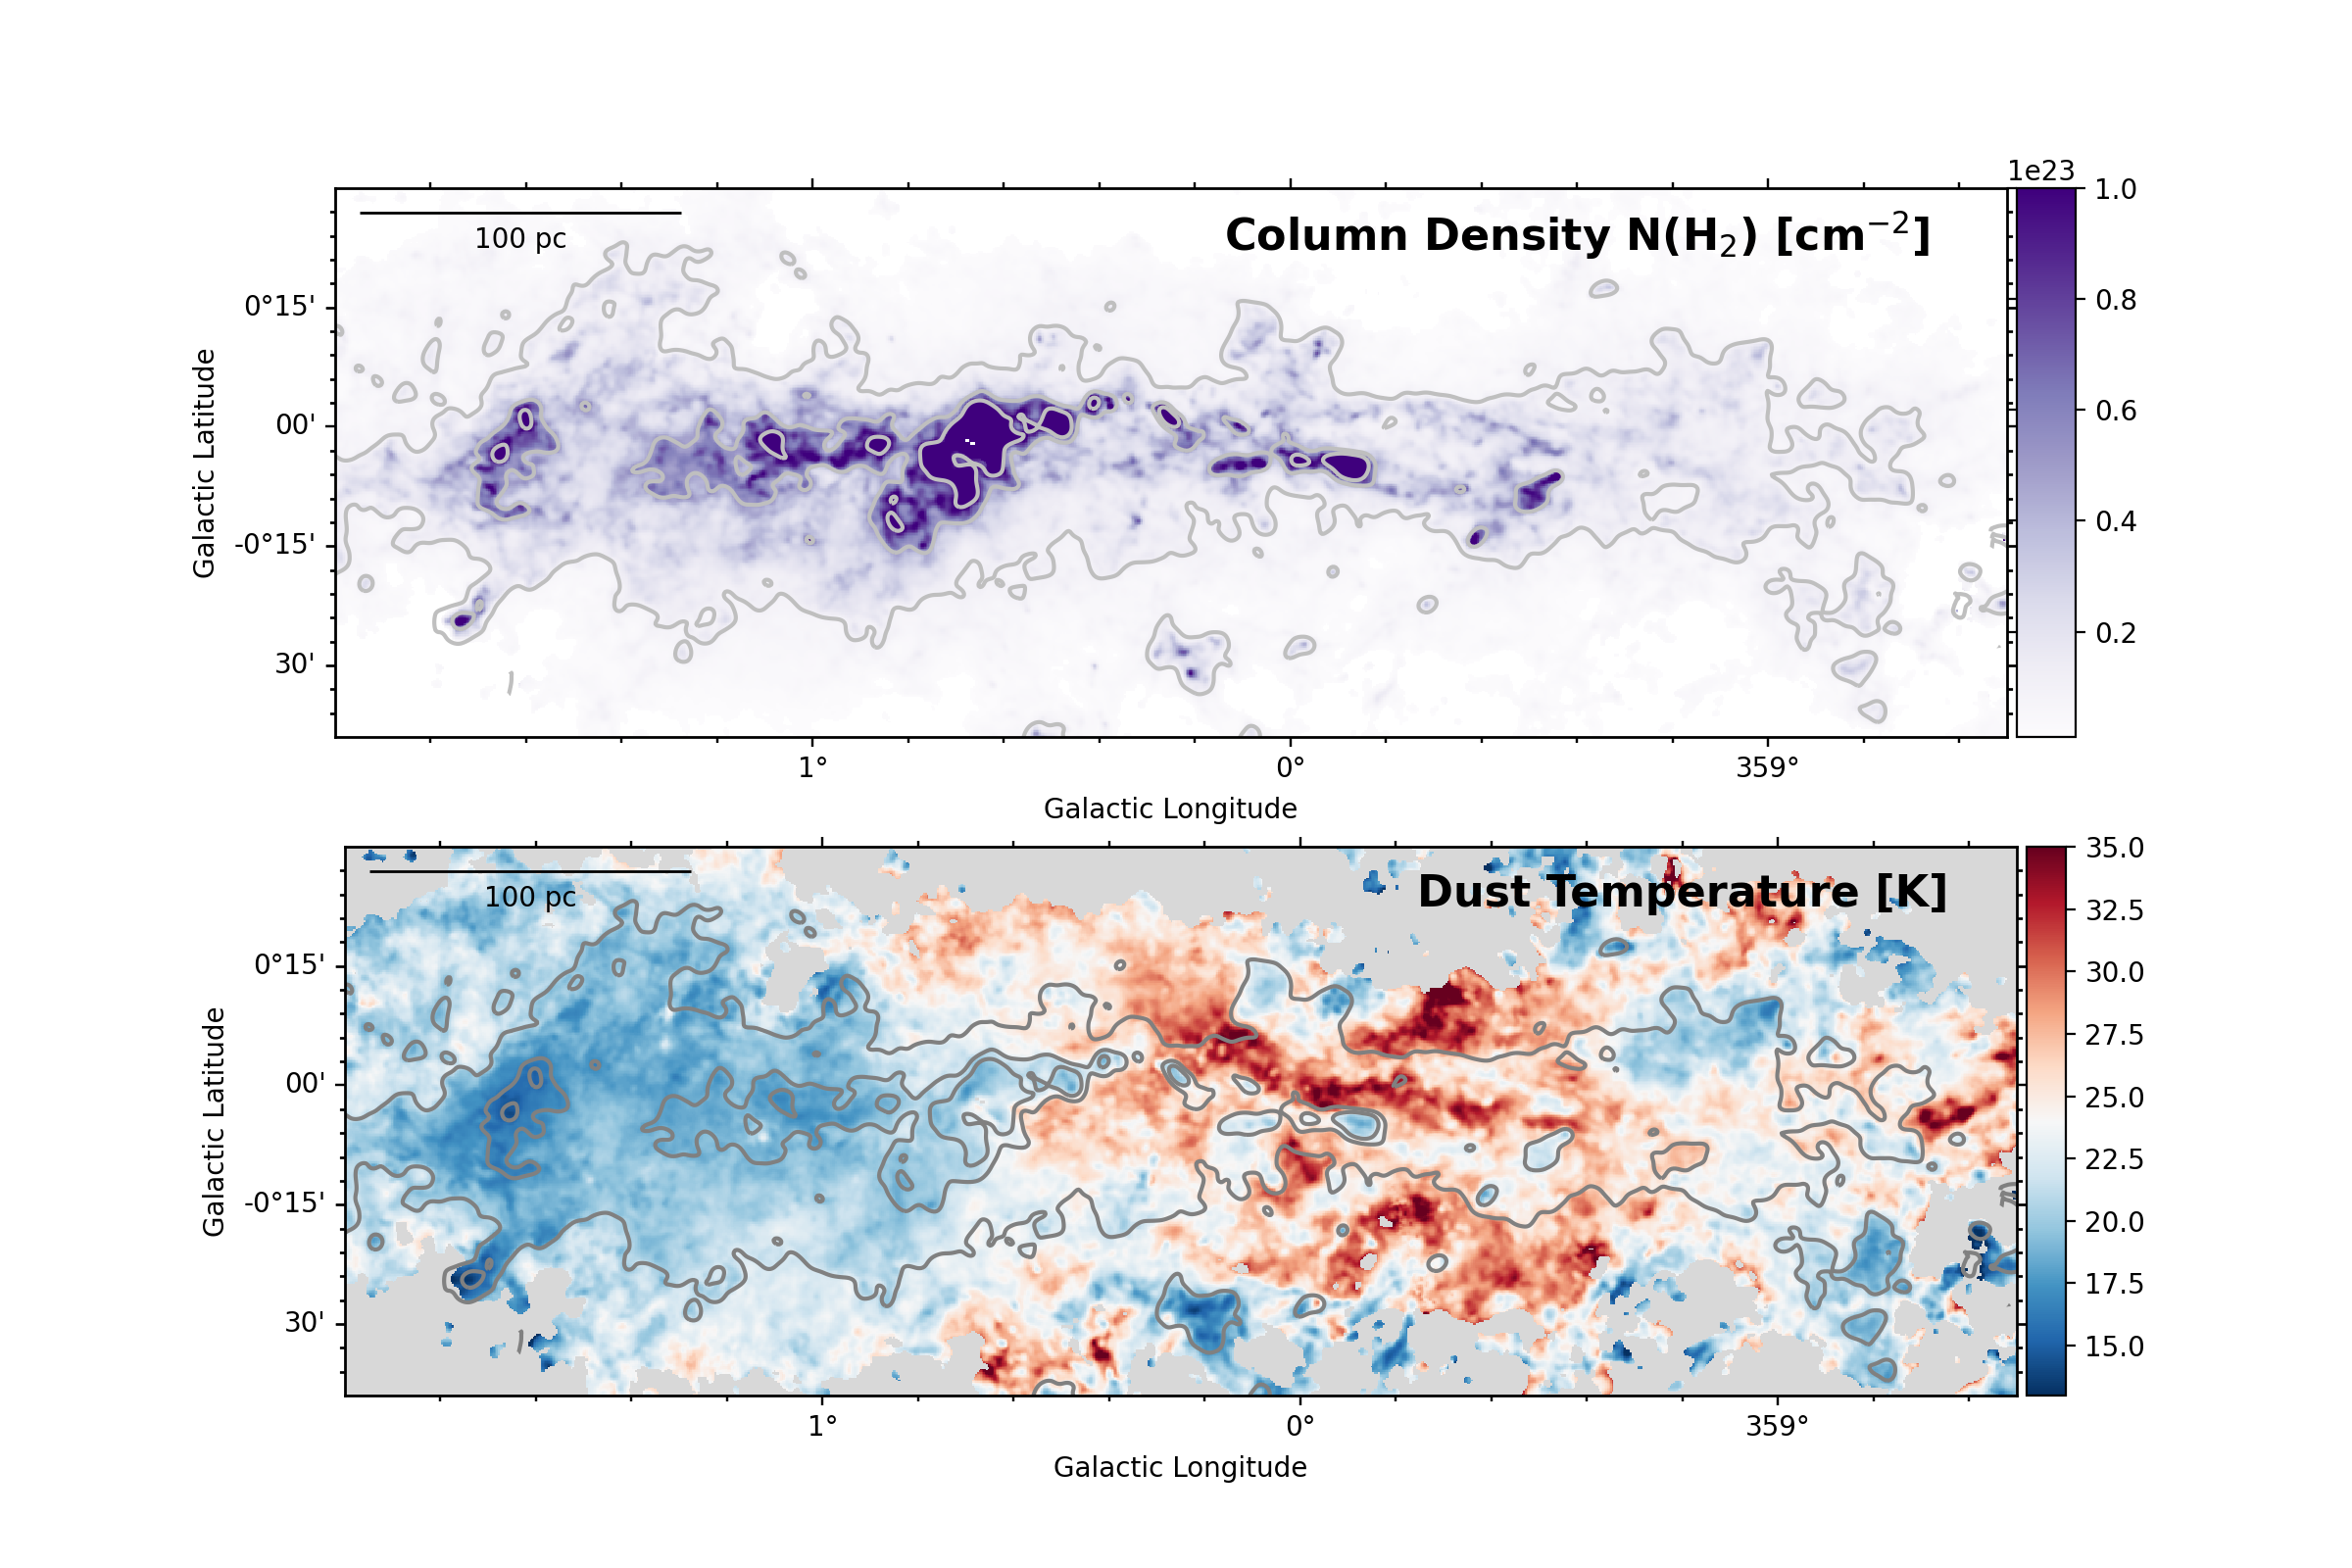

INFO: Auto-setting resolution to 128.451 dpi [aplpy.core]


In [8]:
# Newest figure
%matplotlib nbagg
fig = plt.figure(1, figsize=(12,8))
fig.clf()


f1 = aplpy.FITSFigure(columnlist, 0, figure=fig, subplot=(2,1,1))#[0.2,0.5,0.9,0.5])
#f1.recenter(0.0,0.0, width=4.0, height=1.2) #ORIGINAL
f1.recenter(0.25,-0.075, width=3.5, height=1.15) # to match former Fig. 3 random ds9 range
f1.show_colorscale(cmap='Purples', vmin=0.1e+22,vmax=1e+23)#, stretch='log')
#f1.show_colorbar() # stopped working in Feb. 2022 :(
f1.add_colorbar()
#f1.set_nan_color('0.85')
f1.set_nan_color('white')
f1.colorbar.set_width(0.3)
f1.show_contour(columnlist,0, levels=[1e+22,5e+22,1e+23], 
                colors='0.75',
                #colors=['orange','brown','white'],
                #colors=[(0.33,0.667,1)]*10 + [color + (alpha,) for alpha in np.linspace(1,2)],
                smooth=3, kernel='gauss')
#f1.add_label(358.9, 0.50, 'Column Density N(H$_2$) [cm$^{-2}$]', 
#             color='black', size=16,weight='bold') #FOR PREVIOUS RANGE
f1.add_label(359.4, 0.40, 'Column Density N(H$_2$) [cm$^{-2}$]', 
             color='black', size=16,weight='bold') # FOR RANDOM NEW DS9 RANGE
#f1.set_tick_labels_format(xformat='ddd.d', yformat='dd.d')# stopped working in Feb. 2022 :(
#f1.set_xaxis_coord_type('longitude')
#f1.set_xaxis_coord_type('latitude')
f1.ticks.set_color('black')
f1.add_scalebar(0.674*u.degree)
f1.scalebar.set_corner('top left')
f1.scalebar.set_label('100 pc')



f2 = aplpy.FITSFigure(templist, 0, figure=fig, subplot=(2,1,2))#[0.2,0.5,0.9,0.5])
#f2.recenter(0.0,0.0, width=4.0, height=1.2)#ORIGINAL
f2.recenter(0.25,-0.075, width=3.5, height=1.15) # to match former Fig. 3 random ds9 range
f2.show_colorscale(cmap='RdBu_r', vmin=13, vmax=35)#, stretch='log')
#f2.show_colorbar()# stopped working in Feb. 2022 :(
f2.add_colorbar()
f2.set_nan_color('0.85')
#f2.show_contour(columnlist, 0, levels=[1e+22,5e+22,1e+23], colors=['white','blue','black'],
#                smooth=3, kernel='gauss')
f2.show_contour(columnlist, 0, levels=[1e+22,5e+22,1e+23], colors='0.5',
                smooth=3, kernel='gauss')

#f2.set_tick_labels_format(xformat='ddd.d', yformat='dd.d') # stopped working in Feb. 2022 :(
#f2.add_label(358.7, 0.5, 'Dust Temperature [K]', 
#             color='black', size=16,weight='bold') #FOR PREVIOUS RANGE
f2.add_label(359.2, 0.40, 'Dust Temperature [K]', 
             color='black', size=16,weight='bold') # FOR RANDOM NEW DS9 RANGE
f2.ticks.set_color('black')
f2.add_scalebar(0.674*u.degree)
f2.scalebar.set_corner('top left')
f2.scalebar.set_label('100 pc')

#works for f1 or f2 but not fig.....
# go FIGure...
# ha!

### Did NOT save Feb. 2022, but need to update path and uncomment if you want to save the figures and put them in the paper :)
#f1.save('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/CMZ_nh2_temp_plots.eps')
#f1.save('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/CMZ_nh2_temp_plots.png')


#Saved modified footprint November 2023
f1.save(figpath+'CMZ_nh2_temp_plots_modrange.pdf')

